In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv8 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
########### Unknown detection without openset function was tested 
#### The notebook is under mixedlog folder

designated_ukc_cls = 5
embedding_size = 12
# num_classes= 3
pt_epochs = 2
ukc_label=7
octrain_epochs = 1
lr_rate = 2.5
wait_patience = 8
optimizer = 'adam'

oset = OpenSet()

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 400, val_0:, 50, test_0:, 50, train_1:, 400, val_1:, 50, test_1:, 50, train_2:, 400, val_2:, 50, test_2:, 50, train_3:, 400, val_3:, 50, test_3:, 50, train_4:, 400, val_4:, 50, test_4:, 50, class 5 is added as ukc
ukc_5:, 50
length of train_data - (num_seq_per_cls * num_class)// batch size: 62
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 17:47:49.198377
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.7077 - precision: 0.8823 - recall: 0.5363
Epoch 1: val_accuracy improved from -inf to 0.87946, saving model to data\ptmodel_2022-04-25_17_47_49.198377\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_17_47_49.198377\assets
62/62 [==============================] - 8s 115m

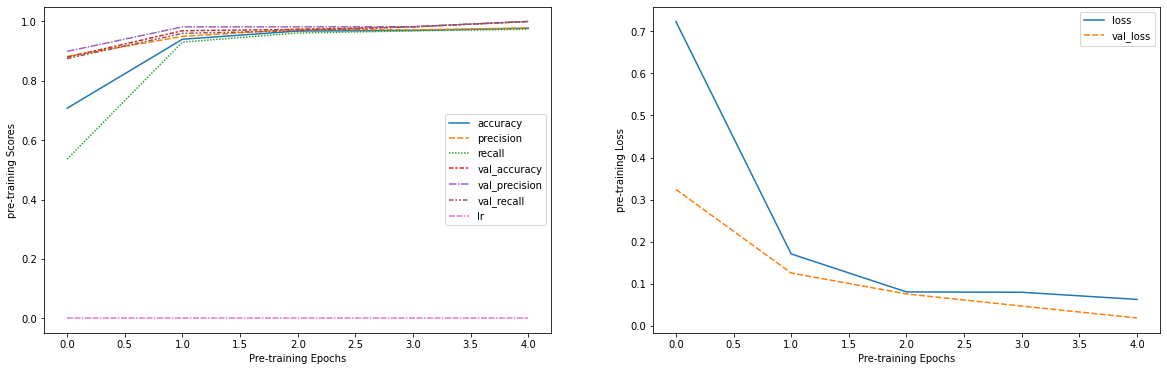

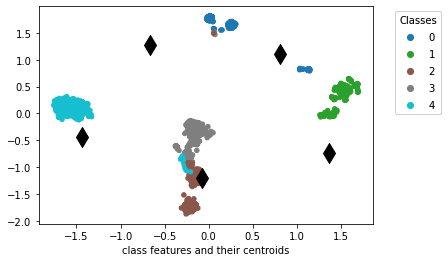

In [3]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=500,
                                                          designated_ukc_cls=designated_ukc_cls)
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 400, val_0:, 50, test_0:, 50, train_1:, 400, val_1:, 50, test_1:, 50, train_2:, 400, val_2:, 50, test_2:, 50, train_3:, 400, val_3:, 50, test_3:, 50, train_4:, 400, val_4:, 50, test_4:, 50, class 5 is added as ukc
ukc_5:, 50
length of train_data - (num_seq_per_cls * num_class)// batch size: 62
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 17:53:23.147653
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 0.7522 - accuracy: 0.6784 - precision_1: 0.8902 - recall_1: 0.5106
Epoch 1: val_accuracy improved from -inf to 0.92411, saving model to data\ptmodel_2022-04-25_17_53_23.147653\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_17_53_23.147653\assets
62/62 [=============================

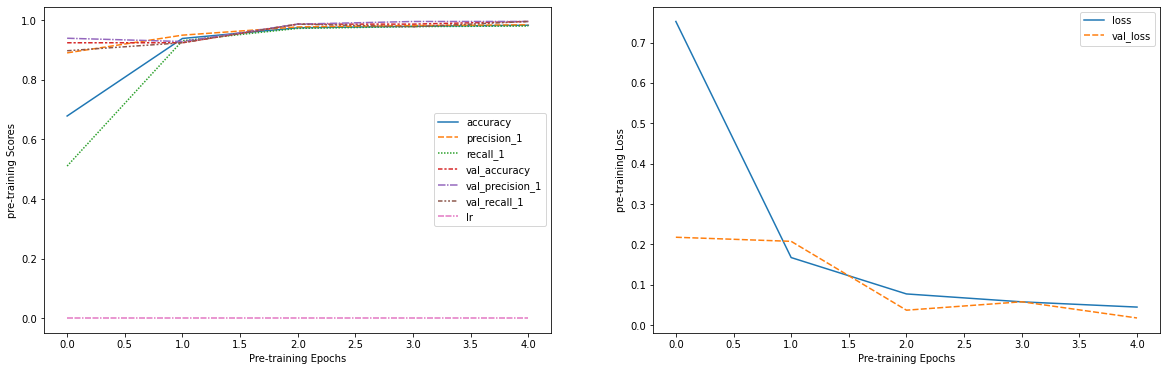

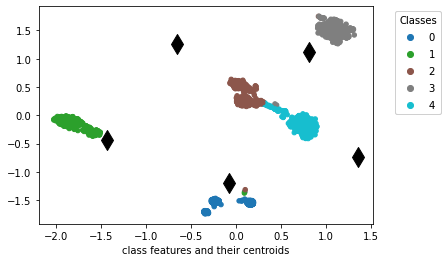

In [6]:
### 176  with 500K
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog,designated_ukc_cls=designated_ukc_cls, 
                                                           debug=False, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=500, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           )

oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

In [5]:
train_data.element_spec[1]

TensorSpec(shape=(32, 5), dtype=tf.float32, name=None)

In [10]:
###  value of a feature belonging  to class -1
oset.centroids[1]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([16.003529  ,  1.4185143 ,  0.        ,  0.        ,  9.455306  ,
        0.        ,  0.        ,  0.        ,  0.17689548,  0.        ,
        0.        ,  6.583226  ,  5.1400533 ,  0.27508405,  3.4530776 ,
        5.2587533 ], dtype=float32)>

In [9]:
oset.total_labels[0]

1

In [8]:
#### centroid for that class
oset.total_features[0]

array([15.169563  ,  0.4477359 ,  0.        ,  0.        ,  8.5067425 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  6.587845  ,  4.8031473 ,  0.43221167,  3.4640954 ,
        5.4919434 ], dtype=float32)

In [16]:
print(oset.total_labels[1])
print(oset.features[1])
print(oset.centroids[0])

0
tf.Tensor(
[ 0.40872055 10.066846   10.971976    0.          2.7730184   0.
  0.          2.4733748   4.2880173   0.          0.          0.
  0.          0.          0.          0.        ], shape=(16,), dtype=float32)
tf.Tensor(
[4.3152618e-01 1.0259276e+01 1.1183964e+01 0.0000000e+00 2.8011615e+00
 0.0000000e+00 0.0000000e+00 2.4241257e+00 4.3577285e+00 4.1510691e-03
 6.1609456e-04 0.0000000e+00 1.3791474e-02 0.0000000e+00 0.0000000e+00
 0.0000000e+00], shape=(16,), dtype=float32)


padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 3200, val_0:, 400, test_0:, 400, train_1:, 3200, val_1:, 400, test_1:, 400, train_2:, 3200, val_2:, 400, test_2:, 400, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 300
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 18:29:36.499217
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9843 - precision_4: 0.9944 - recall_4: 0.9743
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_18_29_36.499217\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_18_29_36.499217\assets
300/300 [==============================] - 34s 113ms/step - loss: 0.0501 - accuracy: 0.9843 - precision_4: 0.99

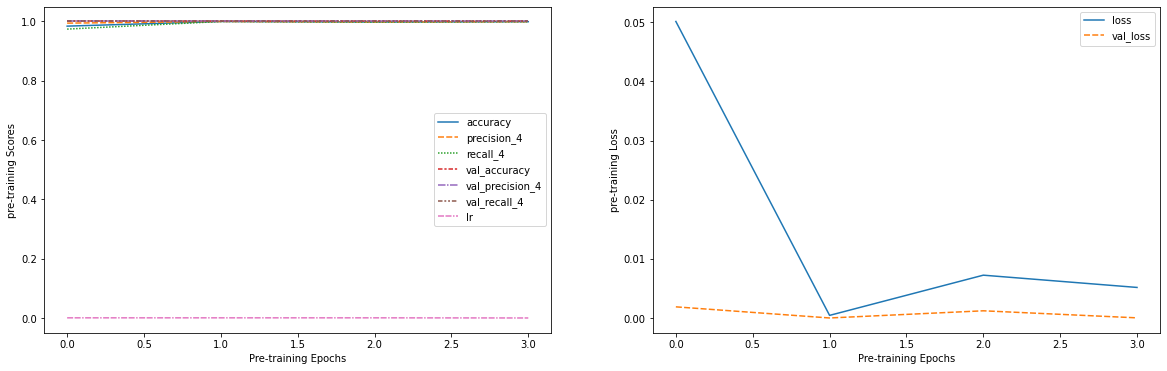

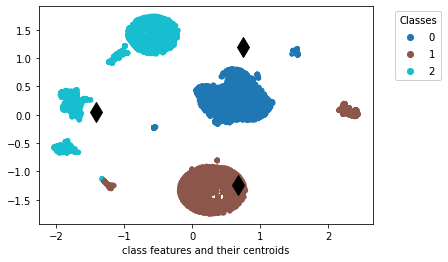

In [17]:
# 4k with no meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=4000,
                                                          designated_ukc_cls=designated_ukc_cls)
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 3200, val_0:, 400, test_0:, 400, train_1:, 3200, val_1:, 400, test_1:, 400, train_2:, 3200, val_2:, 400, test_2:, 400, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 300
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 18:33:49.451785
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.9842 - precision_5: 0.9947 - recall_5: 0.9661
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_18_33_49.451785\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_18_33_49.451785\assets
300/300 [==============================] - 76s 252ms/step - loss: 0.0526 - accuracy: 0.9842 - precision

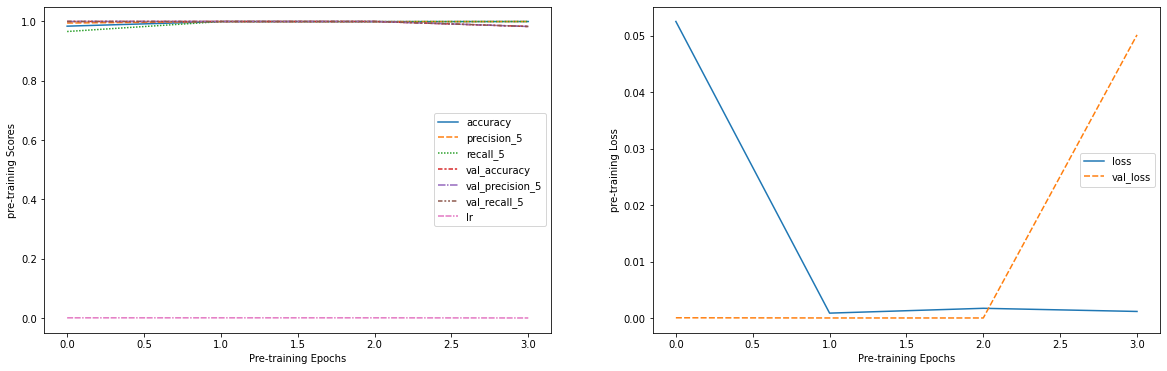

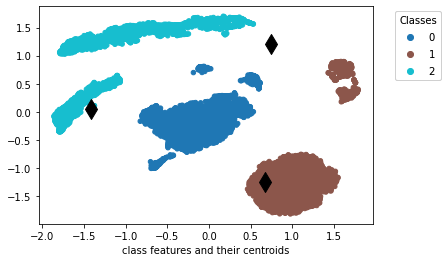

In [18]:
#4k with meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, designated_ukc_cls=designated_ukc_cls,
                                                           ablation=4000,padded_char_len=176, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',                                                          
                                                          )
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 4000, val_0:, 500, test_0:, 500, train_1:, 4000, val_1:, 500, test_1:, 500, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 250
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 18:17:58.016391
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9886 - precision_2: 0.9886 - recall_2: 0.9886
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_18_17_58.016391\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_18_17_58.016391\assets
250/250 [==============================] - 27s 104ms/step - loss: 0.0291 - accuracy: 0.9886 - precision_2: 0.9886 - recall_2: 0.9886 - val_loss: 1.1759e-0

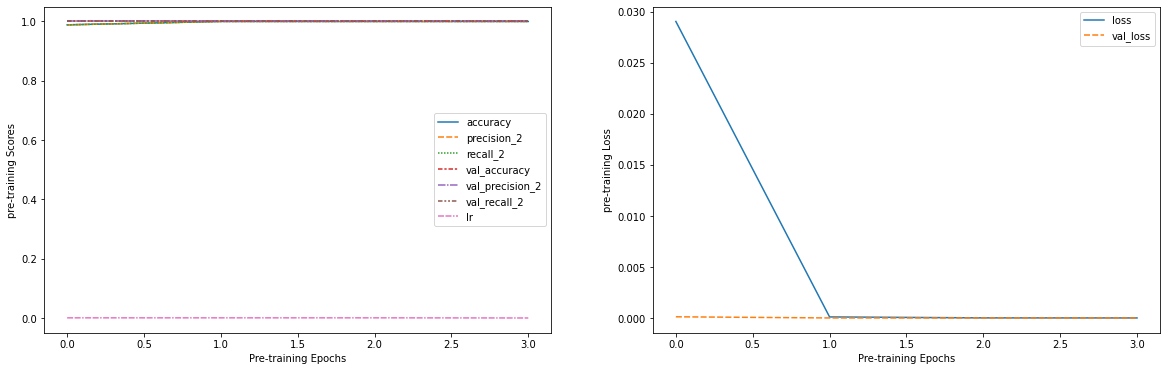

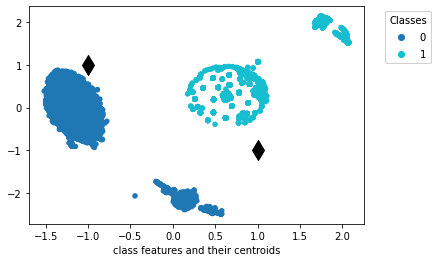

In [12]:
# 5k with no meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=5000,
                                                          designated_ukc_cls=designated_ukc_cls)
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 4000, val_0:, 500, test_0:, 500, train_1:, 4000, val_1:, 500, test_1:, 500, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 250
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 18:21:46.308104
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9893 - precision_3: 0.9893 - recall_3: 0.9893
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_18_21_46.308104\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_18_21_46.308104\assets
250/250 [==============================] - 62s 247ms/step - loss: 0.0325 - accuracy: 0.9893 - precision_3: 0.9893 - recall_3: 0.9893 - val_loss: 1

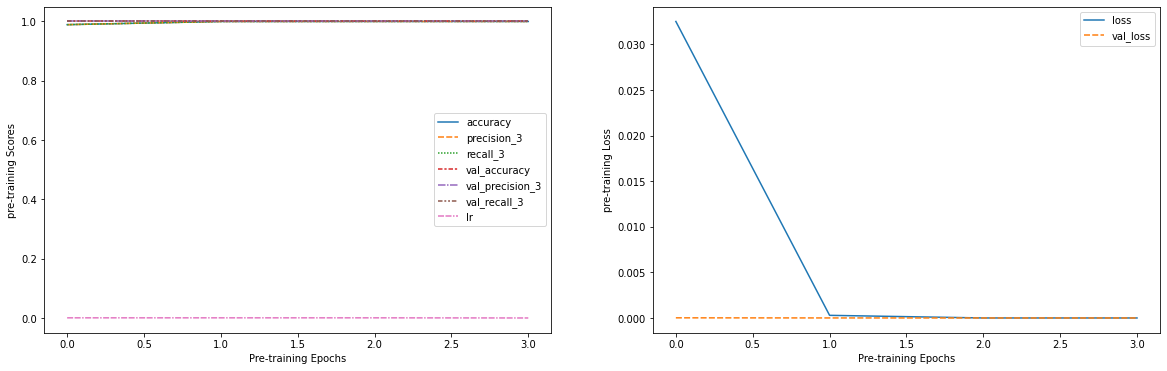

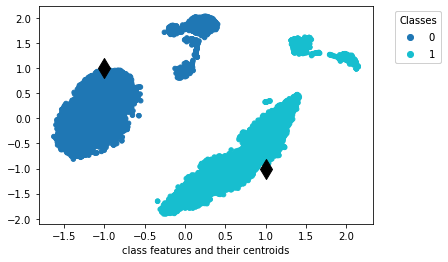

In [13]:
### 5k with meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog,designated_ukc_cls=designated_ukc_cls, 
                                                           debug=False, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=5000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           )

oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 8000, val_0:, 1000, test_0:, 1000, train_1:, 8000, val_1:, 1000, test_1:, 1000, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 500
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 18:43:39.214125
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
500/500 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9952 - precision_6: 0.9952 - recall_6: 0.9952
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_18_43_39.214125\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_18_43_39.214125\assets
500/500 [==============================] - 52s 103ms/step - loss: 0.0113 - accuracy: 0.9952 - precision_6: 0.9952 - recall_6: 0.9952 - val_loss: 4.170

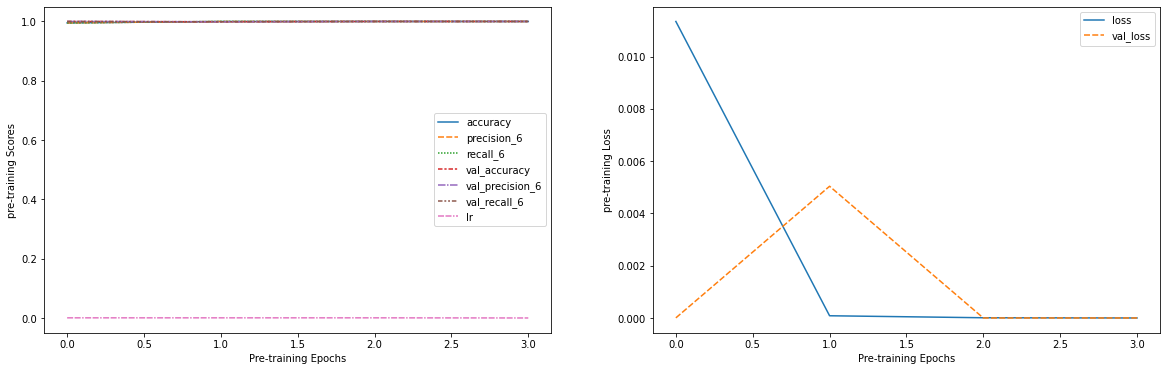

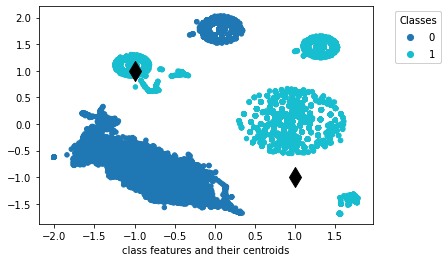

In [19]:
# 10k with no meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=10000,
                                                          designated_ukc_cls=designated_ukc_cls)
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 8000, val_0:, 1000, test_0:, 1000, train_1:, 8000, val_1:, 1000, test_1:, 1000, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 500
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 18:50:33.406000
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
500/500 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9939 - precision_7: 0.9939 - recall_7: 0.9939
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_18_50_33.406000\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_18_50_33.406000\assets
500/500 [==============================] - 124s 248ms/step - loss: 0.0153 - accuracy: 0.9939 - precision_7: 0.9939 - recall_7: 0.9939 - val_lo

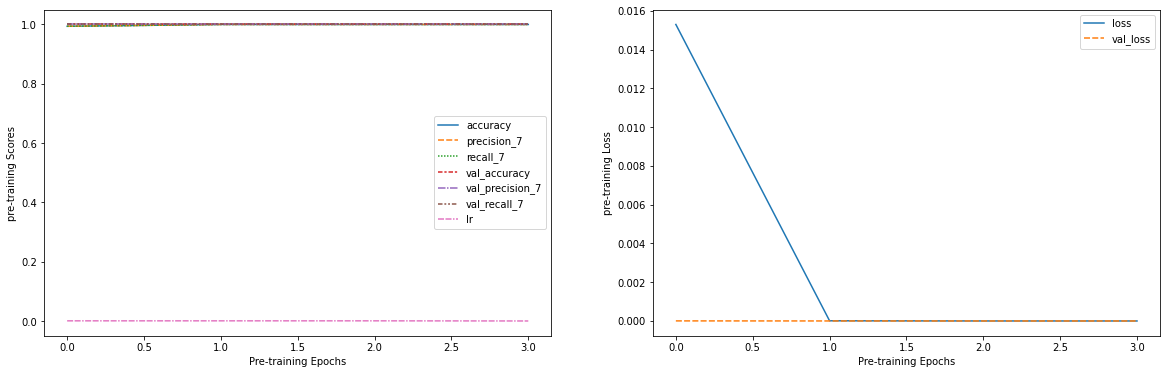

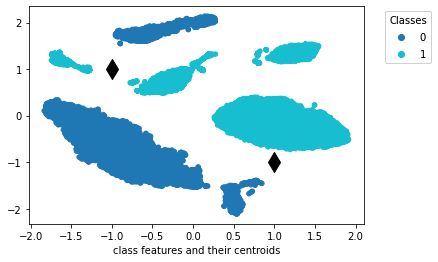

In [20]:
### 10k with meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog,designated_ukc_cls=designated_ukc_cls, 
                                                           debug=False, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=10000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           )

oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 22400, val_0:, 2800, test_0:, 2800, train_1:, 22400, val_1:, 2800, test_1:, 2800, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 1400
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 19:02:53.299621
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
1400/1400 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9967 - precision_8: 0.9967 - recall_8: 0.9967
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_19_02_53.299621\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_19_02_53.299621\assets
1400/1400 [==============================] - 142s 101ms/step - loss: 0.0113 - accuracy: 0.9967 - precision_8: 0.9967 - recall_8: 0.9967 - val_los

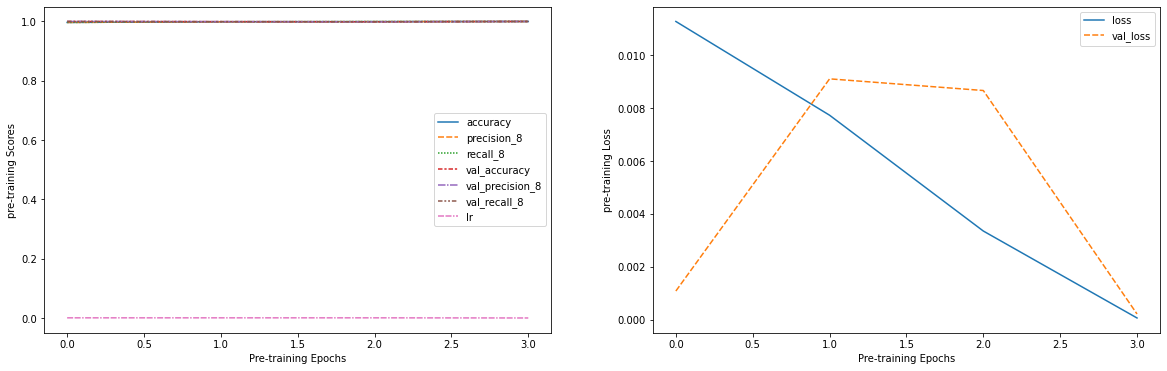

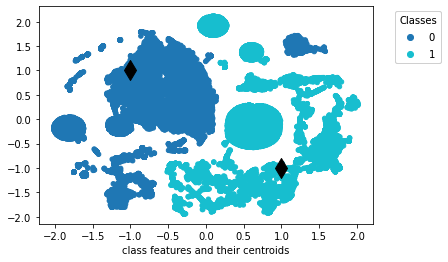

In [21]:
# 28k with no meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=28000,
                                                          designated_ukc_cls=designated_ukc_cls)
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 22400, val_0:, 2800, test_0:, 2800, train_1:, 22400, val_1:, 2800, test_1:, 2800, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 1400
got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 19:20:53.474694
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
1400/1400 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9974 - precision_9: 0.9974 - recall_9: 0.9974
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-25_19_20_53.474694\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_19_20_53.474694\assets
1400/1400 [==============================] - 340s 243ms/step - loss: 0.0080 - accuracy: 0.9974 - precision_9: 0.9974 - recall_9: 0.9974 -

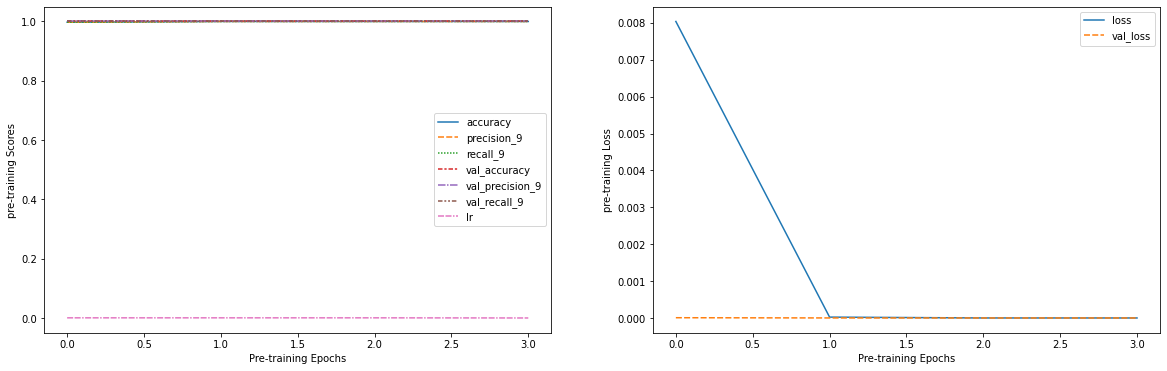

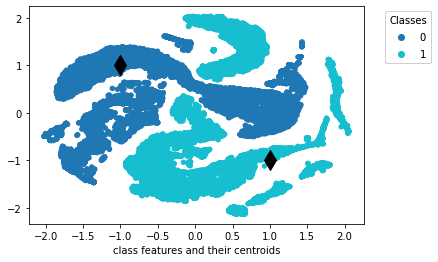

In [22]:
### 28k with meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog,designated_ukc_cls=designated_ukc_cls, 
                                                           debug=False, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=28000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           )

oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                   )

got all the dataset


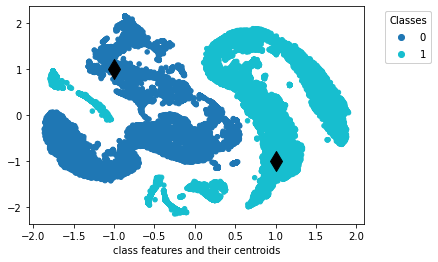

In [23]:
#with meta and 28K
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                    ptmodel_get_mode='import',
#                                    # ptmodel_path='data\ptmodel_2022-04-25_19_20_53.474694',
                                   perplexity=300)

got all the dataset


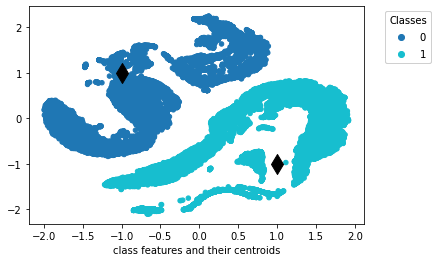

In [24]:
#with meta and 28K
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                    ptmodel_get_mode='import',
#                                    # ptmodel_path='data\ptmodel_2022-04-25_19_20_53.474694',
                                   perplexity=400)

got all the dataset


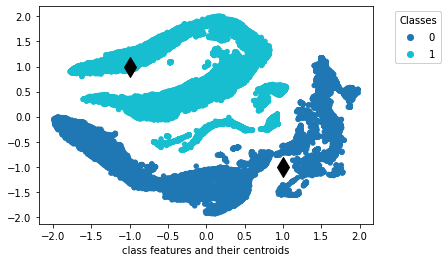

In [25]:
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                    ptmodel_get_mode='import',
#                                    # ptmodel_path='data\ptmodel_2022-04-25_19_20_53.474694',
                                   perplexity=300, tsne_lr=160)

In [ ]:
### without meta
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=28000,
                                                          designated_ukc_cls=designated_ukc_cls)
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, manual_color_map=False,                                 
                                    ptmodel_get_mode='import',
                                   ptmodel_path='data\ptmodel_2022-04-25_19_02_53.299621',
                                   perplexity=300, tsne_lr=160)